In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [43]:
ls

 Volume in drive C is This PC
 Volume Serial Number is E408-B7AE

 Directory of C:\Users\91807\Desktop\Excelr\ASSIGNMENT\KNN

30-12-2022  16:00    <DIR>          .
12-11-2022  13:03    <DIR>          ..
08-12-2022  22:27    <DIR>          .ipynb_checkpoints
12-11-2022  13:03            10,053 glass.csv
30-12-2022  16:00            56,790 glass_KNN.ipynb
12-11-2022  13:03               550 problem_statement(Glass).txt
12-11-2022  13:03                62 Problem_Statement(Zoo).txt
12-11-2022  13:03             4,600 Zoo.csv
10-12-2022  17:30            51,726 zoo_KNN.ipynb
               6 File(s)        123,781 bytes
               3 Dir(s)  164,242,444,288 bytes free


In [44]:
glass=pd.read_csv('glass.csv')

In [45]:
glass.sample(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
81,1.51593,13.25,3.45,1.43,73.17,0.61,7.86,0.00,0.00,2
27,1.51721,12.87,3.48,1.33,73.04,0.56,8.43,0.00,0.00,1
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7
198,1.51531,14.38,0.00,2.66,73.10,0.04,9.08,0.64,0.00,7
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
71,1.51848,13.64,3.87,1.27,71.96,0.54,8.32,0.00,0.32,2
89,1.51640,12.55,3.48,1.87,73.23,0.63,8.08,0.00,0.09,2
136,1.51806,13.00,3.80,1.08,73.07,0.56,8.38,0.00,0.12,2
188,1.52247,14.86,2.20,2.06,70.26,0.76,9.76,0.00,0.00,7
59,1.51754,13.39,3.66,1.19,72.79,0.57,8.27,0.00,0.11,1


In [46]:
x=glass.iloc[:,:-1]
y=glass.iloc[:,-1]

In [72]:
glass['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

Text(0, 0.5, 'count')

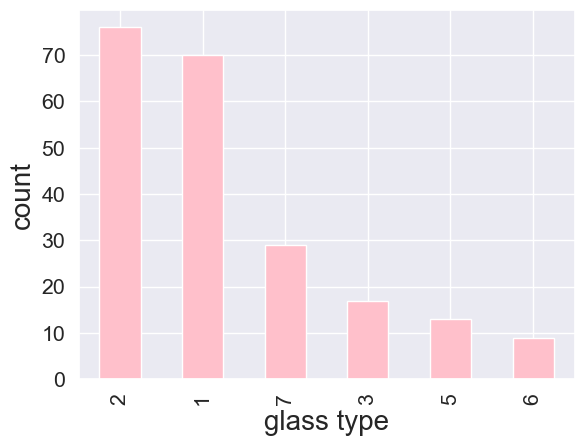

In [82]:
glass['Type'].value_counts().plot(kind='bar',color="pink")
plt.xlabel("glass type",size=20)
plt.ylabel("count",size=20)

In [48]:
x=(x-x.min(axis=0))/(x.max(axis=0)-x.min(axis=0))

In [49]:
x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.000000,0.0
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.000000,0.0
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.000000,0.0
3,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.000000,0.0
4,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
209,0.223003,0.512782,0.000000,0.806854,0.500000,0.012882,0.348513,0.336508,0.0
210,0.250219,0.630075,0.000000,0.529595,0.580357,0.000000,0.276022,0.504762,0.0
211,0.417032,0.545865,0.000000,0.538941,0.644643,0.000000,0.279740,0.520635,0.0
212,0.235294,0.548872,0.000000,0.514019,0.678571,0.000000,0.283457,0.498413,0.0


In [50]:
# num_folds=10
# kfold=KFold(n_splits=10)
#model=KNeighborsClassifier(n_neighbors=1)


In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,shuffle=True,random_state=20)

In [67]:
model=KNeighborsClassifier(n_neighbors=1)
model.fit(x_train,y_train)
pred=model.predict(x_test)
print("accuracy score of model:",accuracy_score(pred,y_test))

accuracy score of model: 0.6


In [79]:
cm=confusion_matrix(y_test,pred)
print("confusion matrix:\n",cm)

confusion matrix:
 [[10  3  2  0  0  0]
 [ 7 18  0  1  1  0]
 [ 3  5  0  0  0  0]
 [ 0  1  0  2  0  1]
 [ 0  0  0  0  2  0]
 [ 0  1  0  1  0  7]]


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

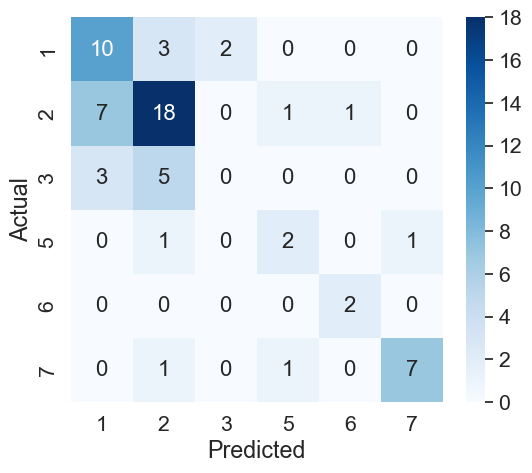

In [81]:
df_cm = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (6,5))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})


In [54]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.50      0.67      0.57        15
           2       0.64      0.67      0.65        27
           3       0.00      0.00      0.00         8
           5       0.50      0.50      0.50         4
           6       0.67      1.00      0.80         2
           7       0.88      0.78      0.82         9

    accuracy                           0.60        65
   macro avg       0.53      0.60      0.56        65
weighted avg       0.55      0.60      0.57        65



# visualizing the cv[cross validation]

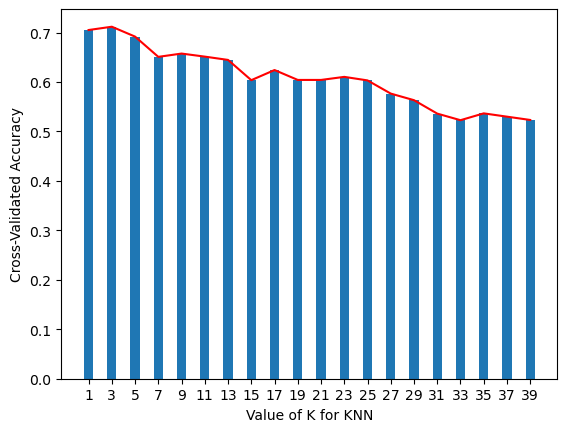

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline
k_range = [2*i+1 for i in range(0,20)] 
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,x_train , y_train, cv=10)
    k_scores.append(scores.mean())
    
# plot to see clearly
plt.bar(k_range, k_scores)
plt.plot(k_range, k_scores,color="red")

plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(k_range)
plt.show()

In [56]:
np.argmax(k_scores)

1

In [57]:
k_range[1]

3

# grid search cv 

In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
n_neighbors=np.array([2*i+1 for i in range(0,10)])
param_grid=dict(n_neighbors=n_neighbors)
n_neighbors

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])

In [60]:
model=KNeighborsClassifier()
grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=5)
grid.fit(x_train , y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])})

In [61]:
print(grid.best_score_)
print(grid.best_params_)

0.6979310344827586
{'n_neighbors': 1}
